[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


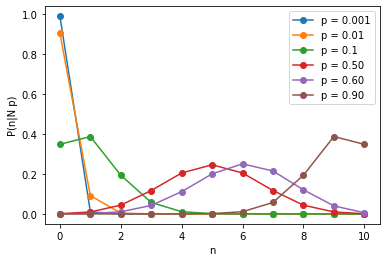

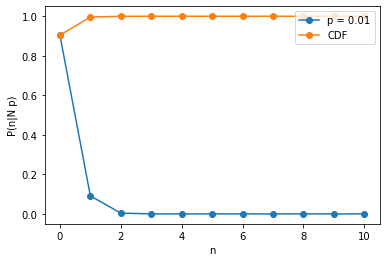

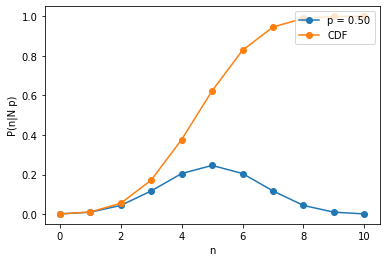

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# the binomial distribution
#
def binomial(n, N, f):
    
    notf = 1 - f
    notn = N - n
     
    # Gamma(n+1) = n!
    #
    # working in log space 
    # gammaln(n+1) = log(n!)
    #
    logcoeff = gammaln(N+1) - gammaln(n+1) - gammaln(notn+1)
    logp     = logcoeff + n*np.log(f) + notn*np.log(notf)
    return np.exp(logp), logp

def posterior_binomial(n, N, f):
    
    notf = 1 - f
    notn = N - n
     
    logcoeff = gammaln(N+2) - gammaln(n+1) - gammaln(notn+1)
    logp     = logcoeff + n*np.log(f) + notn*np.log(notf)
    return np.exp(logp), logp


N = 10
n = np.linspace(0, N, N+1) # n is the variable
print(n)

b1  = binomial(n, N, 0.001)  # p=0.001
b2  = binomial(n, N, 0.01)   # p=0.01
b3  = binomial(n, N, 0.10)   # p=0.10
b4  = binomial(n, N, 0.50)   # p=0.50
b5  = binomial(n, N, 0.60)   # p=0.60
b6  = binomial(n, N, 0.90)   # p=0.90

plt.plot(n, b1[0],  marker='o', label='p = 0.001')
plt.plot(n, b2[0],  marker='o', label='p = 0.01')
plt.plot(n, b3[0],  marker='o', label='p = 0.1')
plt.plot(n, b4[0],  marker='o', label='p = 0.50')
plt.plot(n, b5[0],  marker='o', label='p = 0.60')
plt.plot(n, b6[0],  marker='o', label='p = 0.90')
plt.legend(loc="upper right")
plt.xlabel("n")
plt.ylabel("P(n|N p)")
plt.show()

plt.plot(n, b2[0],  marker='o', label='p = 0.01')
plt.plot(n, np.cumsum(b2[0]),  marker='o', label='CDF')
plt.legend(loc="upper right")
plt.xlabel("n")
plt.ylabel("P(n|N p)")
plt.show()

plt.plot(n, b4[0],  marker='o', label='p = 0.50')
plt.plot(n, np.cumsum(b4[0]),  marker='o', label='CDF')
plt.legend(loc="upper right")
plt.xlabel("n")
plt.ylabel("P(n|N p)")
plt.show()




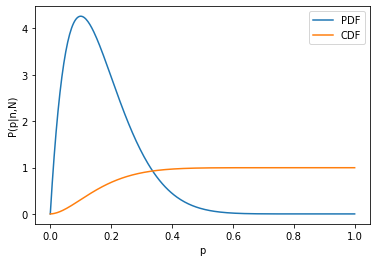

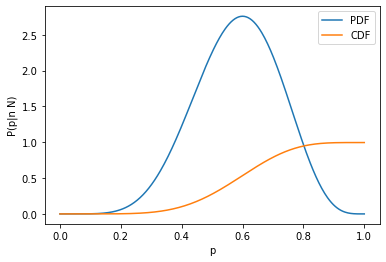

cdf at max 0.5976704778718236 is 0.5350681195771048


In [3]:
min_f = 0.0000000001
max_f = 0.9999999999
#print(f)

# posterior for 
# N = 10, n = N/10 = 1
#
N = 10
n = N/10
bsize = 1/(100*np.sqrt(N))
nbin  = int((max_f-min_f)/bsize)
f = np.linspace(min_f, max_f, nbin) # f is the variable

p1 = posterior_binomial(n, N, f)
plt.plot(f, p1[0],  label='PDF')
plt.plot(f, np.cumsum(p1[0]*bsize),  label='CDF')

plt.legend(loc="upper right")
plt.xlabel("p")
plt.ylabel("P(p|n,N)")
plt.show()

# posterior for 
# N = 10, n = 6
#
N = 10
n = 6
p2 = posterior_binomial(n, N, f)
p2_cdf = np.cumsum(p2[0]*bsize)

plt.plot(f, p2[0],  label='PDF')
plt.plot(f, p2_cdf, label='CDF')

plt.legend(loc="upper right")
plt.xlabel("p")
plt.ylabel("P(p|n N)")
plt.show()

max_idx = np.argmax(p2[0])
f_max = min_f + max_idx*bsize
cdf_at_max = p2_cdf[max_idx]
print('cdf at max', f_max, 'is', cdf_at_max)

N 1000 n 600 n/N 0.6 0.6001265422134451


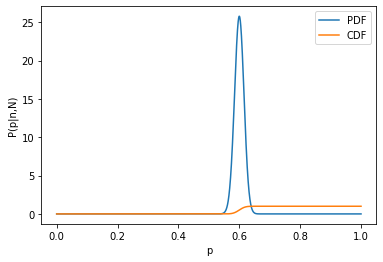

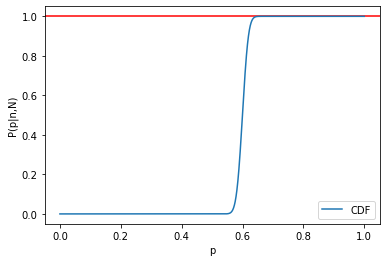

In [4]:
# effect of amount of data
alpha = 100
N     = 10*alpha
n     =  6*alpha

bsize = 1/(100*np.sqrt(N))
nbin  = int((max_f-min_f)/bsize)
f     = np.linspace(min_f, max_f, nbin) # f is the variable

post = posterior_binomial(n, N, f)
print("N", N, "n", n, "n/N", n/N, f[np.argmax(post[0])])

plt.plot(f, post[0],  label='PDF')
plt.plot(f, np.cumsum(post[0]*bsize),  label='CDF')
plt.legend(loc="upper right")
plt.xlabel("p")
plt.ylabel("P(p|n,N)")
plt.show()

plt.axhline(y=1, color='r', linestyle='-')
plt.plot(f, np.cumsum(post[0]*bsize),  label='CDF')
plt.legend(loc="lower right")
plt.xlabel("p")
plt.ylabel("P(p|n,N)")
plt.show()



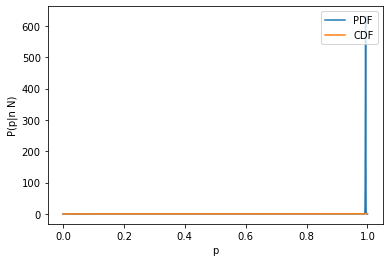

Text(0, 0.5, 'P(p|n N)')

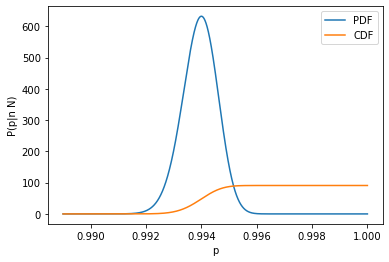

In [5]:
from scipy.special import logsumexp
# posterior for 
# Moderna data
#
# N = 15000, n = 90
#
N = 15000
n = N-90

bsize = 1/(100*np.sqrt(N))
nbin  = int((max_f-min_f)/bsize)
f     = np.linspace(min_f, max_f, nbin) # f is the variable

p2 = posterior_binomial(n, N, f)
plt.plot(f, p2[0],  label='PDF')
plt.plot(f, np.cumsum(p2[0]*bsize),  label='CDF')

plt.legend(loc="upper right")
plt.xlabel("p")
plt.ylabel("P(p|n N)")
plt.show()

f = np.linspace(0.989, max_f, nbin) # f is the variable

p2 = posterior_binomial(n, N, f)
plt.plot(f, p2[0],  label='PDF')
plt.plot(f, np.cumsum(p2[0]*bsize),  label='CDF')

plt.legend(loc="upper right")
plt.xlabel("p")
plt.ylabel("P(p|n N)")


mu 4.8 sigma 1.9595917942265424


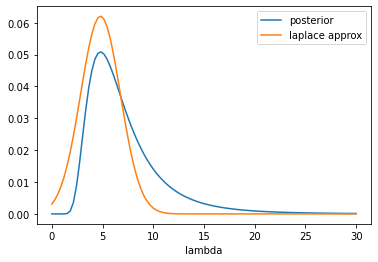

In [6]:
# Laplace approximation
# when data follows an exponential distribution
#

# the exponential distribution P(t|lambda)
#
def exponential(t, l):
    p = np.exp(-t/l)/l
    return p


# the posterior probability of lambda (assuming a flat prior)
#
l = np.linspace(0.0001, 30, 100)
def exp_posterior(l, data):
    like = []
    
    for x in range(len(l)):  # for each lambda, calculate the likelihood (thislike)
        
        thisl = l[x] # the value of lambda
        
        thislike = 1 # initialzie the likelihood to 1
        for d in range(len(data)):
            thislike *= exponential(data[d], thisl)   # multiply the probability of all data points
           
        like.append(thislike) # store this likelihood
     
    evidence = np.sum(like)   # the sum of all likelihood values * prior (1), gives us the evidence
    
    posterior = like/evidence # the normalized posterior
     
    return posterior

# The laplace approximation of the posterior
#
# mu    = <t>_data
# sigma = <t>_data/sqrt(N)
#
#
def exp_laplace(l, data):
    laplace = []
    
    N = len(data)
    mean_data = np.sum(data)/N
     
    # laplace approximation
    mu  = mean_data
    var = mean_data * mean_data / N
    print("mu", mu, "sigma", np.sqrt(var))
    
    for x in range(len(l)):  # for each lambda, calculate the likelihood (thislike)
        
        thisl = l[x] # the value of lambda
        
        thislaplace = np.exp(-(thisl-mu)**2/(2*var))
            
        laplace.append(thislaplace) # store this value
    
    # normalize, this is not quite a Normal distribution 
    # as we have restricted the range to (0, 30) 
    # [fit is -infinity,+infinity for the Normal dist]
    laplace = laplace/np.sum(laplace) 
    return laplace

# the data in the lecture notes
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11]
posterior = exp_posterior(l, data)
laplace   = exp_laplace  (l, data)
plt.plot(l, posterior, label = 'posterior')
plt.plot(l, laplace,   label = 'laplace approx')
plt.legend(loc="upper right")
plt.xlabel("lambda")
plt.show()



In [ ]:
# the data in the lecture notes
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11]
posterior = exp_posterior(l, data)
laplace   = exp_laplace  (l, data)
plt.plot(l, posterior, label = 'posterior')
plt.plot(l, laplace,   label = 'laplace approx')
plt.legend(loc="upper right")
plt.xlabel("lambda")
plt.show()
